In [1]:
from pydeeprecsys.rl.manager import MovieLensFairnessManager
from pydeeprecsys.rl.agents.reinforce import ReinforceAgent

In [2]:
manager = MovieLensFairnessManager(slate_size=1)
episodes=500
runs = 3

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def save_and_plot_results(results, filename):
    col_names = ['Parameter Name', 'param_value'] + ['run_'+str(i) for i in range(runs)] + ['mean']
    df = pd.DataFrame([k.split('=') + v + [sum(v)/(runs)] for k,v in results.items()], columns=col_names)
    df.to_csv(f'output/{filename}.csv', index=False)
    df = pd.read_csv(f'output/{filename}.csv')
    sns.set(rc={'figure.figsize':(12,4)})
    sns.set_context("paper")
    sns.set_style("white")
    sns.color_palette("Set2")
    plot = sns.lineplot(data=df, x="param_value", y='mean', hue='Parameter Name', legend='full')
    plot.set(xlabel='Parameter Values', ylabel='Avg Return Moving Average (100)')
    plt.savefig(f"output/{filename}.pdf")

# REINFORCE

In [3]:
agent = ReinforceAgent
default_params = {
    "n_actions": manager.env.action_space.n,
    "state_size": manager.env.observation_space.shape[0],
    "hidden_layers": [128, 128],
    "discount_factor": 0.95,
    "learning_rate": 0.0001,
}
optimize_params = {
    "hidden_layers": [[64, 64], [128, 128], [256, 256]],
    "discount_factor": [0.9, 0.95, 0.99],
    "learning_rate": [0.00001, 0.0001, 0.001],
}
results = manager.hyperparameter_search(
    agent=agent,
    runs_per_combination=runs,
    episodes=episodes,
    params=optimize_params,
    default_params=default_params,
)

Tested combination learning_rate=0.001 round 2 result was 33.88052317083336		

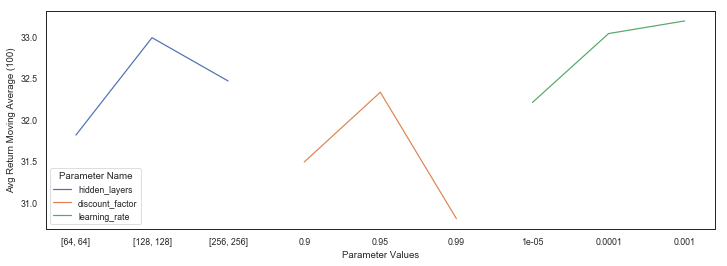

In [5]:
save_and_plot_results(results, 'reinforce_hyperparams')

# Actor Critic

In [6]:
from pydeeprecsys.rl.agents.actor_critic import ActorCriticAgent
agent = ActorCriticAgent
default_params = {
    "n_actions": manager.env.action_space.n,
    "state_size": manager.env.observation_space.shape[0],
    "actor_hidden_layers": [128, 128],
    "critic_hidden_layers": [128, 64],
    "discount_factor": 0.95,
    "actor_learning_rate": 0.001,
    "critic_learning_rate": 0.0001,
}
optimize_params = {
    "critic_hidden_layers": [[64, 32], [128, 64], [256, 128]],
    "discount_factor": [0.9, 0.95, 0.99],
    "critic_learning_rate": [0.00001, 0.0001, 0.001],
}
results = manager.hyperparameter_search(
    agent=agent,
    runs_per_combination=runs,
    episodes=episodes,
    params=optimize_params,
    default_params=default_params,
)

Tested combination critic_learning_rate=0.001 round 2 result was 21.423447614319535		

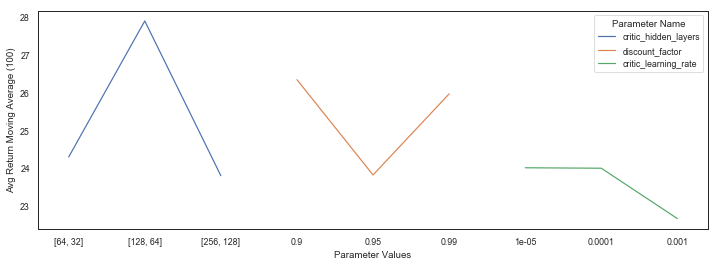

In [7]:
save_and_plot_results(results, 'actorcritic_hyperparams')

# Dueling DQN

In [5]:
from pydeeprecsys.rl.agents.rainbow import RainbowDQNAgent
agent = RainbowDQNAgent
default_params = {
    "output_size": manager.env.action_space.n,
    "input_size": manager.env.observation_space.shape[0],
    "network_update_frequency": 5,
    "network_sync_frequency": 200,
    "priority_importance": 0.6,
    "priority_weigth_growth": 0.01,
    "buffer_size": 10000,
    "buffer_burn_in": 1000,
    "batch_size": 32,
    "noise_sigma": 0.017,
    "discount_factor": 0.95,
    "learning_rate": 0.001,
    "hidden_layers": [256, 256, 64, 64],
}

In [3]:
optimize_params = {
    "network_update_frequency": [3,5,7],
    "network_sync_frequency": [100,200,300],
    "priority_importance": [0.4,0.6,0.8],
}
results = manager.hyperparameter_search(
    agent=agent,
    runs_per_combination=runs,
    episodes=episodes,
    params=optimize_params,
    default_params=default_params,
)

Tested combination priority_importance=0.8 round 2 result was 39.16504069861563		

NameError: name 'save_and_plot_results' is not defined

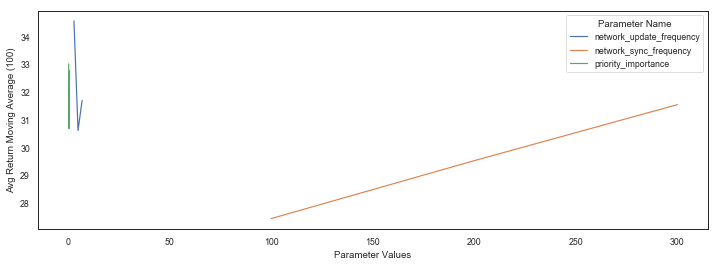

In [12]:
save_and_plot_results(results, 'dueling_hyperparams1')

Tested combination buffer_burn_in=1500 round 2 result was 30.715843504015115		

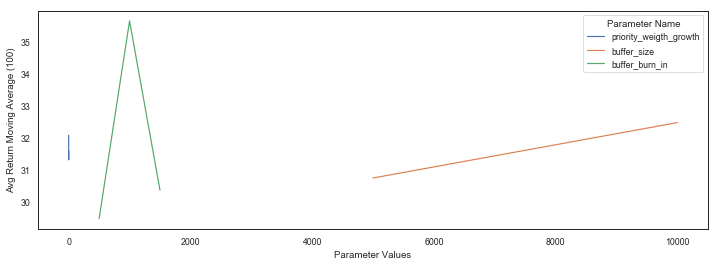

In [6]:
optimize_params = {
    "priority_weigth_growth": [0.0001, 0.001, 0.01],
    "buffer_size": [5000, 10000],
    "buffer_burn_in": [500,1000,1500],
}
results = manager.hyperparameter_search(
    agent=agent,
    runs_per_combination=runs,
    episodes=episodes,
    params=optimize_params,
    default_params=default_params,
)
save_and_plot_results(results, 'dueling_hyperparams2')

Tested combination hidden_layers=[512, 512, 128, 128] round 2 result was 41.747300833491245		

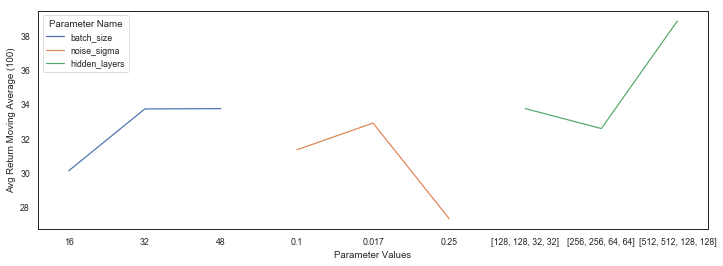

In [6]:
optimize_params = {    
    "batch_size": [16,32,48],
    "noise_sigma": [0.1, 0.017, 0.25],
    "hidden_layers": [[128, 128, 32, 32], [256, 256, 64, 64], [512, 512, 128, 128]],
}
results = manager.hyperparameter_search(
    agent=agent,
    runs_per_combination=runs,
    episodes=episodes,
    params=optimize_params,
    default_params=default_params,
)
save_and_plot_results(results, 'dueling_hyperparams3')